
# <center>Python课程实践</center>

## 课程内容

### 实践题目
#### TMDB电影数据挖掘分析高票房电影

* 本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。
* 通过观察数据我们可以尝试回答以下问题：
  * （1）每年最受欢迎的电影是那些类别
  * （2）盈利最多的电影有哪些特点

### 数据文件
* tmdb-movies.csv

### 本节任务
* 提出问题，对数据进行清洗
* 数据探索、数据建模
* 数据可视化的过程

> TMDB 电影数据分析
* id: 电影 ID
* imdb_id: IMDB_ID
* popularity: 流行程度
* budget: 预算
* revenue: 收益
* original_title: 电影名称
* cast: 演员
* homepage: 主页
* director: 导演
* tagline: 标语
* keywords: 关键词
* overview: 简介
* runtime: 播放时间
* genres: 电影风格
* production_companies: 出品公司
* release_date: 发行日
* vote_count: 投票数
* vote_average: 平均投票
* release_year: 发行年份
* budget_adj: 调整后预算
* revenue_adj: 调整后收益

In [1]:
# 导入常用库。
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('data/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# 查看数据有没有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [ ]:
# 检查缺失值
df.isnull().sum()

In [4]:
# 缺失值向下填充  用前一个非缺失值去填充该缺失值
a = df.isnull().sum()
a = a[a > 0].index
def mf(name):
    df[name] = df[name].fillna(method='ffill')
    return df
for b in a:
    mf(b)

In [5]:
# 确认修改
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [6]:
# 检查重复
sum(df.duplicated())

1

In [7]:
# 删除重复
df.drop_duplicates(inplace=True)

In [8]:
# 确认修改
sum(df.duplicated())

0

In [9]:
# vote用cut分段
vote_labels = ['VOTE:0~2','VOTE:2~4','VOTE:4~6','VOTE:6~8','VOTE:8~10']
df['vote_cut'] = pd.cut(df['vote_average'],bins=[0,2,4,6,8,10],labels=vote_labels)

In [10]:
df['vote_cut']

0        VOTE:6~8
1        VOTE:6~8
2        VOTE:6~8
3        VOTE:6~8
4        VOTE:6~8
5        VOTE:6~8
6        VOTE:4~6
7        VOTE:6~8
8        VOTE:6~8
9        VOTE:6~8
10       VOTE:6~8
11       VOTE:4~6
12       VOTE:6~8
13       VOTE:4~6
14       VOTE:6~8
15       VOTE:6~8
16       VOTE:6~8
17       VOTE:6~8
18       VOTE:6~8
19       VOTE:6~8
20       VOTE:6~8
21       VOTE:6~8
22       VOTE:6~8
23       VOTE:4~6
24       VOTE:6~8
25       VOTE:6~8
26       VOTE:6~8
27       VOTE:6~8
28       VOTE:6~8
29       VOTE:6~8
           ...   
10836    VOTE:4~6
10837    VOTE:4~6
10838    VOTE:4~6
10839    VOTE:6~8
10840    VOTE:4~6
10841    VOTE:4~6
10842    VOTE:6~8
10843    VOTE:4~6
10844    VOTE:4~6
10845    VOTE:4~6
10846    VOTE:4~6
10847    VOTE:4~6
10848    VOTE:6~8
10849    VOTE:6~8
10850    VOTE:4~6
10851    VOTE:6~8
10852    VOTE:4~6
10853    VOTE:6~8
10854    VOTE:4~6
10855    VOTE:6~8
10856    VOTE:4~6
10857    VOTE:4~6
10858    VOTE:4~6
10859    VOTE:6~8
10860    V

In [11]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


In [12]:
# 电影风格
df['genres'].value_counts()

Drama                                                 717
Comedy                                                713
Documentary                                           313
Drama|Romance                                         289
Comedy|Drama                                          282
Comedy|Romance                                        269
Horror|Thriller                                       259
Horror                                                254
Comedy|Drama|Romance                                  222
Drama|Thriller                                        138
Comedy|Family                                         102
Action|Thriller                                       101
Thriller                                               93
Drama|Comedy                                           92
Animation|Family                                       90
Crime|Drama|Thriller                                   82
Crime|Drama                                            74
Comedy|Horror 

In [ ]:
# 取数据中非nan值
df = df[df['genres'].notnull()]
df

In [13]:
# 一列中的文本拆分为多行,genres多个值的就每一行去一个取，其他列一样
df = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop = True).rename('genres'))
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_cut,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,VOTE:6~8,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,VOTE:6~8,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,VOTE:6~8,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,VOTE:6~8,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,VOTE:6~8,Action


In [14]:
#检查缺失值
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
vote_cut                0
genres                  0
dtype: int64

In [15]:
# 删除缺失值行
df.dropna(axis=0, inplace=True)

In [16]:
#检查重复
sum(df.duplicated())

0

In [19]:
df['genres'].value_counts()

Drama              4770
Comedy             3800
Thriller           2912
Action             2386
Romance            1713
Horror             1641
Adventure          1472
Crime              1356
Family             1233
Science Fiction    1231
Fantasy             916
Mystery             811
Animation           700
Documentary         522
Music               408
History             334
War                 271
Foreign             188
TV Movie            169
Western             166
Name: genres, dtype: int64

In [20]:
b = df['genres'].value_counts().head(4).index
b

Index(['Drama', 'Comedy', 'Thriller', 'Action'], dtype='object')

In [21]:
c = df['genres'].value_counts().index
c 

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Family', 'Science Fiction', 'Fantasy', 'Mystery',
       'Animation', 'Documentary', 'Music', 'History', 'War', 'Foreign',
       'TV Movie', 'Western'],
      dtype='object')

In [22]:
df['genres5'] = df['genres']

In [23]:
for a in c:
    if a not in b:
        df['genres5'].replace(a,'other_genres',inplace=True)

In [24]:
df['genres5'].value_counts()

other_genres    13131
Drama            4770
Comedy           3800
Thriller         2912
Action           2386
Name: genres5, dtype: int64

In [25]:
df_g = df[df['genres5']!= 'other_genres']
df_g 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_cut,genres,genres5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,VOTE:6~8,Action,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,VOTE:6~8,Thriller,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,VOTE:6~8,Action,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,VOTE:6~8,Thriller,Thriller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,VOTE:6~8,Thriller,Thriller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,VOTE:6~8,Action,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,VOTE:6~8,Action,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,VOTE:6~8,Thriller,Thriller
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,VOTE:6~8,Drama,Drama
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,VOTE:6~8,Thriller,Thriller


## 探索性数据分析1
* 提示在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（vote average 分布情况 ，各阶段评分占比多少？）

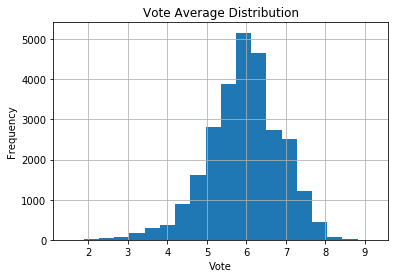

In [26]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。
df['vote_average'].hist(bins=20,figsize=(6,4))  
plt.title('Vote Average Distribution')
plt.ylabel('Frequency')
plt.xlabel('Vote');

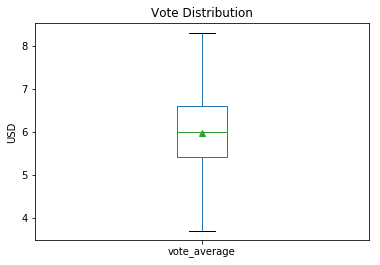

In [27]:
df['vote_average'].plot.box(showfliers=False,showmeans=True,figsize=(6,4))
plt.title('Vote Distribution')
plt.ylabel('USD');

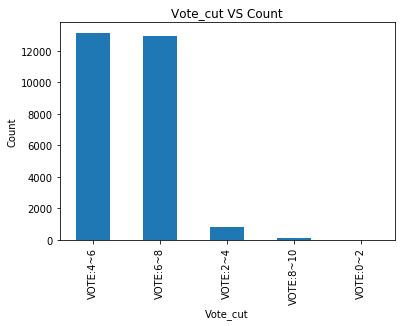

In [28]:
df['vote_cut'].value_counts().plot.bar(figsize=(6,4))
plt.title('Vote_cut VS Count')
plt.ylabel('Count')
plt.xlabel('Vote_cut');

数据成正态分布，评分大多集中在4分到8分之间。

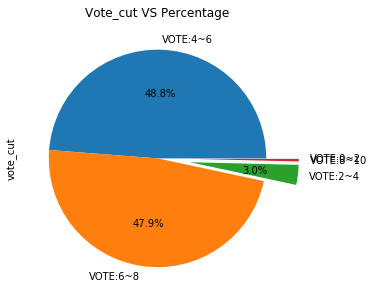

In [29]:
df.vote_cut.value_counts().plot.pie(explode = (0,0,0.3,0.3,0.3), autopct=lambda pct:'' if pct< 1 else "{:.1f}%".format(pct),figsize=(5,5))
plt.title('Vote_cut VS Percentage');

vote4~6与vote6~8占比差不多，都约是48%左右。

### 研究问题 2（投票次数排名前四的电影风格与评分的关系）

In [ ]:
df_g.groupby(['vote_cut','genres5']).size().unstack()

In [ ]:
df_g.groupby(['vote_cut','genres5']).size().unstack().plot.bar(figsize=(8,5))
plt.title('Vote Cut VS Genres')
plt.xticks(rotation=0) # 控制 x 轴刻度文字的角度
plt.ylabel('Count');

在投票次数排名前四的电影类型中，大部分投票都集中在4至8分，在vote：4~6中Comedy和Drama次数相当，在vote：6~8中Drama次数最多。

In [ ]:
df_g.groupby(['vote_average','genres5']).size().unstack().plot(figsize=(8,5))
plt.title('genres VS vote_average VS Count')
plt.ylabel('Count');

5.5分之前，四种电影风格都差不多，5.5分之后，Drama比较靠前。

### 研究问题 3（探索预算与收益的关系）

In [ ]:
df.plot.scatter(x='revenue_adj',y='budget_adj',alpha=0.5)
plt.title('revenue_adj VS budget_adj')

In [ ]:
df['revenue_adj'].corr(df['budget_adj'])

投资与收益的相关性一般。

### 研究问题 4（探索平均投票分数与收益的关系）

In [ ]:
df.plot.scatter(x='vote_average',y='revenue_adj',alpha=0.5)
plt.title('user_rating VS price');

In [ ]:
df.groupby('vote_cut')['revenue_adj'].max().plot.bar()
plt.title('Top price for each rating score')
plt.ylabel('revenue_adj');

In [ ]:
df['vote_average'].corr(df['revenue_adj'])

不具备相关性，较高的收益都集中在5到8分之间，评分高有可能有较高的收益。

### 结论
* vote average评分大多集中在4分到8分之间。
* 在投票次数排名前四的电影类型中，大部分投票都集中在4至8分，在vote：4~6中Comedy和Drama次数相当，在vote：6~8中Drama次数最多。
* 投资与收益的相关性一般。
* 平均投票与收益不具备相关性，较高的收益都集中在5到8分之间，评分高有可能有较高的收益。

## 探索性数据分析2

In [ ]:
# 载入相关的标准库
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

### Q1:2014年里，制作成本大于1000000的电影，票房收入利润率是否与评分有关系？
操作思路：首先筛选出14年发行且制作成本大于100万的电影，而要计算收入利润率，需要revenue为非0的数据，待筛选完之后将数据进行可视化操作。

根据问题筛选出满足条件的数据，筛选完之后进行检查，然后再创建一个收入利润率的数据列income_ratio，方便我们的使用。

In [ ]:
df_q1 = df.query('release_year == "2014"').query('budget > 1000000').query('revenue != 0')
df_q1['income_ratio'] = (df_q1['revenue'] - df_q1['budget']) / df_q1['budget']
df_q1.describe()

In [ ]:
df_q1.info()

筛选完的数据没有缺失值，而重复值在最初已经去除过，到此数据应该已经达到了我们所需要的程度，那么开始运用可视化展示并陈述结果

In [ ]:
plt.style.use('default')
plt.figure(figsize = (6,4))
sns.regplot(x ='vote_average',y ='income_ratio',data = df_q1)
plt.xlabel('Average Score')
plt.ylabel('Profit Margin')
plt.title('The Profit margin will more increase when it got higher average score');

虽然有部分离散点散布在图里，但我们仍然能看到图像呈现出正相关的属性，而且回归线也符合数据间正相关的分布趋势，即大部分电影的收入利润率还是跟平均评分呈现出正相关的。

### Q2:各年份中，不同类型的电影的发行情况是怎样的?

In [ ]:
plt.style.use('dark_background')
# 拆分电影类型中的内容成单个的类型
df_genres = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
# 整理数据 
target_data = df_genres.groupby('genres')['release_year'].value_counts().unstack().fillna(0)
target_data['sort_val'] = target_data.sum(axis=1)
target_data = target_data.sort_values('sort_val', axis=0, ascending=False).drop('sort_val', axis=1)
target_data.head()

In [ ]:
target_data.T.plot(colormap='gist_rainbow', figsize=(24, 8), grid=True);

从上面的图像可以看出，戏剧（drama）类型的电影发行量与增速都是最高的，第二的是喜剧（comedy），恐怖片（thriller）排第三。

### Q3: 哪些描述电影的关键字出现频率比较多？

In [ ]:
df_10 = df
df_data = df_10['keywords'].str.split('|',expand = True).stack().reset_index(level = 1,drop = True).rename('keywords')
word_fre = df_data.value_counts()

In [ ]:
word_fre

In [ ]:
wc = WordCloud(width = 1200,height = 800,mode = 'RGBA',background_color = 'rgba(255, 255, 255, 0)',
               colormap = 'Spectral',color_func = lambda *args, **kwargs: 'white')
wc.generate_from_frequencies(word_fre)

In [ ]:
plt.figure(figsize = (8,6))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off');

看起来，女导演，独立电影，小说改编电影等关键词高频词，用于形容电影出现的频率比较高。那么是否存在某个女导演的作品好评度是所有导演中最高的呢？

### Q4:哪个导演的电影评分最高？

操作思路：此问题，需要将电影按照导演进行分组，并取出该导演的电影作品的平均评分进行比较，得出最高分的导演

In [ ]:
# 提取director列非缺失值的数据
df_q2 = df[df['director'].notna()]

In [ ]:
df_q2

因为存在着几个导演一起出作品的情况，我们需要把他们分离出来

In [ ]:
dir_split = df_q2['director'].str.split('|',expand = True).stack().reset_index(level = 1,drop = True).rename('director')
df_q2 = df_q2.drop('director',axis = 1).join(dir_split)

我们提取含有10部作品数据以上的导演，保证导演的水平不会出现太大的偶然性

In [ ]:
dir_list = list(df_q2['director'].value_counts()[df_q2['director'].value_counts()>9].index)
df_q2['check'] = df_q2['director'].isin(dir_list)
df_q2 = df_q2[df_q2['check']]

In [ ]:
df_q2_mean = df_q2.groupby('director')['vote_average'].mean()
h_dir = df_q2_mean.idxmax()
h_soc = df_q2_mean.max()
print('The champion is: {} .And his/her movie got a topping average score: {} !'.format(h_dir,h_soc))

### Q5：电影评分与时间是否存在某种趋势？

操作思路：将数据按照10年进行切片分组，接着再用年份区间内电影评分的平均数与年份区间进行比较，观察数据间的关系

In [ ]:
df_q3 = df
bin_edge = [1960,1970,1980,1990,2000,2010,2020]
bin_labels = ['1960s','1970s','1980s','1990s','2000s','2010s']
df_q3 ['years'] = pd.cut(df_q3['release_year'],bin_edge,labels = bin_labels)

In [ ]:
# 按新变量years检查下所有数据数量的情况
df_q3['years'].value_counts()

虽然1960-1980年之间的电影数据比后续的任意十年间的少，但是数据数量也能满足我们的需求，继续接下来的操作

In [ ]:
# 求出按years分组后各组评分的平均值，作为可视化的条件之一
df_q3_mean = df_q3.groupby('years')['vote_average'].mean()
plt.style.use('default')
df_q3_mean.plot(figsize = (8,4),style = 'bo--')
plt.xlabel('Years')
plt.ylabel('Average Score')
plt.title('Score decreases as the year increases');

在以每10年作为递进梯度时可以看到1970s，即1970-1980的电影总体评分是最高的，而往后，电影评分随时间变化而降低，这是否意味着越往后电影作品的总体质量将越来越低，电影行业是否遇到了瓶颈期呢

### 结论
（注：由于该数据只是提取自其中一个电影数据库的数据，因此所有结论仅适用于该电影数据库范围内的数据。）

* 1.在2014年里，制作成本大于100万的电影，它的平均评分越高，利润率也会越高，但是制作成本低于100万时是否也符合这个规律，就需要重新进行其他相关数据的分析，而其他年份里是否也符合这个规律，也需要探索其他年份的数据才能得出中体的结论。

* 2.越往后发行的电影，戏剧，喜剧与恐怖片是电影发布类型的三巨头，可能近年来的观众比较喜欢这三种类型的电影，但需要其他类型的数据才能进行更深入的分析探讨，而2000年前的电影因为存在统计数据缺失等情况，可能此三类电影不是发行类型的前三名，可能需要考虑其他电影数据库数据进行对比分析。

* 3.女导演，独立电影，小说改编电影等是概括电影的高频词汇。

* 4.数据集中Carl Tibbetts的电影总体评分最高，达到了8.66分。但是数据库中可能存在着大量其他导演的作品未存在数据集中的情况，因此可能存在其他导演具有更高分作品的情况。

* 5.电影作品的总体质量正随着每十年时间的增加而降低，未来可能质量会继续降低，但降低的幅度却在逐渐减少，因此可能电影界遇到了某种瓶颈，电影总体质量在短时间内不会有大的反弹。但是该数据集只是一个电影数据库中的数据，可能需要多比较其他的电影数据库才能得出最终正确的判断。

## 探索性数据分析3
* （1）每年最受欢迎的电影是那些类别 
* （2）盈利最多的电影有哪些特点

In [ ]:
# 加载数据并打印几行。
df=pd.read_csv('data/tmdb-movies.csv')
df.head()

In [ ]:
df.info()

#### 数据清理（提取有可能需要用到的列，组成新的dataframe）
* 问题一：每年最受欢迎的电影是那些类别---可能用到的列：popularity，orginal title,genres,release year 
* 问题二：盈利最多的电影有哪些特点---可能用到的列：budget,revenue,original_title,cast,director,genres，release year，release date，production_company

In [ ]:
df=df[['original_title','popularity','genres','release_year','release_date','budget','revenue','cast','production_companies']]
df.head()

#### 数据清理（寻找并处理重复行）

In [ ]:
sum(df.duplicated())

In [ ]:
#从上面知道，有一行是完全重复的，对其进行操作
df.drop_duplicates(inplace=True)
df.info()

In [ ]:
df.head()

#### 数据清理（将复杂的字符串分解）
* 通过上面的输出结果，以下列是多个字符串，需要分解：genres,cast,production_companies

In [ ]:
df_temp=df['genres'].str.split('|',expand=True) 
df_temp.head()

In [ ]:
df_temp=df['cast'].str.split('|',expand=True) 
df_temp.head()

In [ ]:
df_temp=df['production_companies'].str.split('|',expand=True) 
df_temp.head()

In [ ]:
#通过上面的计算，各个列都会被扩展成5列，所以：
df[['g1','g2','g3','g4','g5']]=df['genres'].str.split('|',expand=True)
df[['c1','c2','c3','c4','c5']]=df['cast'].str.split('|',expand=True)
df[['p1','p2','p3','p4','p5']]=df['production_companies'].str.split('|',expand=True)
df.info()

In [ ]:
df.head()

#### 数据清理（处理缺省值）
* 通过上面的输出结果，我们知道总行数为10865，所以以下列存在缺省值：cast,director,genres,production_companies 注意到上述缺省列大部分为string 类型，无法用平均值进行填充，所以下面用0填充缺省处

In [ ]:
# 用0去填充缺省值
df.fillna(0, inplace=True)
df.info()

In [ ]:
df.head()

#### 数据清理（更改数据类型）
* 通过上面的输出结果，我们知道以下列的数据类型存在问题，需要转换：release_date

In [ ]:
#因为我不需要精确到具体哪一天，所以只提取month
df['release_date']=pd.to_datetime(df['release_date']).dt.month
df.info()

In [ ]:
#到此，原始数据处理完毕
df.head()

### 研究问题 1（每年最受欢迎的电影是那些类别 ）

根据这个问题，我认为需要用到的列是：popularity,release_year，和genres(g1...g5)

In [ ]:
df['release_year'].min(),  df['release_year'].max()

通过上面的结果，我们知道，需要找出从1960年到2015年，每年最受欢迎的电影

In [ ]:
#先按照popularity排好序，然后按照release——year分组，最后每组取第一个
df1=df.sort_values('popularity', ascending=False).groupby('release_year', as_index=False).first()
df1

通过上面的结果，我们已经找出从1960年到2015年，每年最受欢迎的电影，可以从genres列，看出他们是那些类别。 如果想要进一步分析这些电影的类别集中在那些地方

In [ ]:
df_g=(df1[['g1','g2','g3','g4','g5']] ).apply(pd.value_counts)   
df_g

In [ ]:
#去掉没有意义的倒数第二行
df_g.drop([0], inplace=True)

#填充nan值，方便计算
df_g.fillna(0, inplace=True)
df_g

In [ ]:
df_g['Col_sum'] = df_g.apply(lambda x: x.sum(), axis=1)
df_g

对数据进行可视化：

In [ ]:
df_g['Col_sum'].plot(kind='bar',figsize=(12,10))
plt.title('Popularity vs Genres for Most Popular Moive(1960-2105)',fontsize=18)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('Popularity',fontsize=14)

结论：通过上面的数据处理，我们知道：从1960年到2015年的66部最受欢迎的电影中，以下类型是数量最多的：Action，Adventure，Science Fiction，Thriller

### 研究问题 2（盈利最多的电影有哪些特点。）

In [ ]:
df.head()

In [ ]:
#计算电影成本，并取出盈利最高的前10部电影
df['profit']=df['revenue']-df['budget']
df2=df.sort_values('profit',ascending=False).head(10)
df2

In [ ]:
#（1）查看这10部电影与genres有哪些关系：
df2_g=(df2[['g1','g2','g3','g4','g5']] ).apply(pd.value_counts)   

#去掉没有意义的倒数第二行
df2_g.drop([0], inplace=True)

#填充nan值，方便计算
df2_g.fillna(0, inplace=True)

df2_g['Col_sum'] = df2_g.apply(lambda x: x.sum(), axis=1)

df2_g['Col_sum'].plot(kind='pie',figsize=(10,10),autopct='%.0f%%')

plt.title('Profit vs Genres (Top 10 Best profit Movie)',fontsize=18)

结论（1）：通过上面的数据处理，我们知道：盈利最多的10部电影中，以下类型是数量最多的：Action，Adventure，Science Fiction，Thriller

In [ ]:
#（2）查看这10部电影与cast有哪些关系：
df2_c=(df2[['c1','c2','c3','c4','c5']] ).apply(pd.value_counts)   


#填充nan值，方便计算
df2_c.fillna(0, inplace=True)

df2_c['Col_sum'] = df2_c.apply(lambda x: x.sum(), axis=1)

df2_c['Col_sum'].plot(kind='bar',figsize=(8,6),color='y')

plt.title('Profit vs Cast (Top 10 Best profit Movie)',fontsize=18)
plt.ylabel('Movie Quantites',fontsize=14)
plt.xlabel('Cast Name',fontsize=14)

结论（2）：通过上面的数据处理，我们知道：盈利最多的10部电影中，以下演员参演过2部最受欢迎的电影：Chris Evans，Chris hemsworth，Mark Ruffalo，Michellw Rodriguez，Robert Downey，Scarlett Johansson

In [ ]:
#（3）查看这10部电影production companies有哪些特征：
df2_p=(df2[['p1','p2','p3','p4','p5']] ).apply(pd.value_counts)   

#去掉没有意义的行
df2_p.drop([0], inplace=True)

#填充nan值，方便计算
df2_p.fillna(0, inplace=True)

df2_p['Col_sum'] = df2_p.apply(lambda x: x.sum(), axis=1)

# df2_p['Col_sum'].plot(kind='point',figsize=(12,10),color='g')

plt.figure(figsize=(12, 3))
plt.plot(df2_p['Col_sum'],'*',color='g')
plt.xticks(rotation=90)

plt.title('Profit vs Production Companies (Top 10 Best profit Movie)',fontsize=18)
plt.ylabel('Movie Quantites',fontsize=14)
plt.xlabel('Production Companies',fontsize=14)

结论（3）：通过上面的数据处理，我们知道：盈利最多的10部电影中，以下公司投资过2部最受欢迎的电影：Marvel Studio，Twentieth Century Fox Film Corporation，Lightstorm Enteratinment,Dentsu

In [ ]:
#（4）查看这10部电影与popularity，release_year，release_date有哪些关系

#plt.barh(np.arange(10),df2['profit'],tick_label=df2['popularity'])
#plt.xlabel('Profit')
#plt.ylabel('Popularity')

#设置画布大小
fig = plt.figure(figsize=(12,5)) 
#加上图像标题, fontsize=14 字体大小, fontweight='bold' 加粗
fig.suptitle('profit factors', fontsize=18, fontweight='bold') 

#添加第一个子图
ax1 = fig.add_subplot(131)
plt.barh(np.arange(10), df2['profit'], height=0.5, color='y')
plt.ylabel('Popularity',fontsize=14) 
plt.xlabel('Profit',fontsize=14) 

#添加第二个子图
ax2 = fig.add_subplot(132)
plt.barh(np.arange(10),df2['profit'], height=0.5,color='r')
plt.ylabel('Release_year',fontsize=14) 
plt.xlabel('Profit',fontsize=14)

#添加第三个子图
ax3 = fig.add_subplot(133)
plt.barh(np.arange(10),df2['profit'], height=0.5,color='b')
plt.ylabel('Release_month',fontsize=14) 
plt.xlabel('Profit',fontsize=14)

从上面的图形中并不能直观的看出联系，所以我们对数据进行进一步处理：

In [ ]:
df2['popularity'].mean()

结论（4.1）：通过上面的数据处理，我们知道：盈利最多的10部电影,受欢迎的平均程度为9.4分，

In [ ]:
df2['release_year'].value_counts()

结论（4.2）：通过上面的数据处理，我们知道：盈利最多的10部电影,有4部电影出自2015年。

In [ ]:
df2['release_date'].value_counts()

结论（4.3）：通过上面的数据处理，我们知道：盈利最多的10部电影,4月份上映的有3部，7，11，12月各自2部。

### 结论
* 通过上面的数据处理，我们知道：从1960年到2015年的66部最受欢迎的电影中，以下类型是数量最多的：
  * Action，Adventure，Science Fiction，Thriller

* 通过上面的数据处理，我们知道：盈利最多的10部电影中:
  * (1)以下类型是数量最多的：Action，Adventure，Science Fiction，Thriller 
  * (2)以下演员参演过2部最受欢迎的电影：Chris Evans，Chris hemsworth，Mark Ruffalo，Michellw Rodriguez，Robert Downey，Scarlett Johansson 
  * (3)以下公司投资过2部最受欢迎的电影：Marvel Studio，Twentieth Century Fox Film Corporation，Lightstorm Enteratinment,Dentsu 
  * (4)受欢迎的平均程度为9.4分， 
  * (5)有4部电影出自2015年。 
  * (6)4月份上映的有3部，7，11，12月各自2部。

# Any Questions?